# Preliminary exploratory data analysis
### Loading Data and Dependencies

In [1]:
# import all dependencies
library(tidyverse)
library(tidymodels)
library(repr)

# library(ggplot2)
# library(dplyr)
# library(patchwork)

options(repr.matrix.max.rows = 6)

# create data dir and download csv into it
url <- "https://raw.githubusercontent.com/21chanas3/dsci100-group73/c9c58b88eca13be20286f8bf70dce4668b878247/data/healthcare-dataset-stroke-data.csv"
if (!dir.exists("data")) {
    dir.create("data") }
download.file(url, "data/stroke.csv")

stroke <- read_csv("data/stroke.csv")
stroke

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
44679,Female,44,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


### Cleaning and Wrangling

In [2]:
# rename columns to all lowercase
stroke_colnames <- stroke |> colnames() |> make.names() |> tolower()
colnames(stroke) <- stroke_colnames

# convert unknowns to NA
stroke <- stroke |> na_if("Unknown")

# convert categorical vars to factors
stroke <- stroke |> mutate(gender = as_factor(gender), 
                 work_type = as_factor(work_type), 
                 residence_type = as_factor(residence_type), 
                 smoking_status = as_factor(smoking_status),
                 hypertension = as_factor(hypertension),
                 ever_married = as_factor(ever_married),
                 heart_disease = as_factor(heart_disease),
                 stroke = as_factor(stroke))

# rename factor levels to nicer names
stroke$hypertension <- recode_factor(stroke$hypertension, "0" = "No", "1" = "Yes")
stroke$heart_disease <- recode_factor(stroke$hypertension, "0" = "No", "1" = "Yes")
stroke$stroke <- recode_factor(stroke$hypertension, "0" = "No", "1" = "Yes")
stroke$work_type <- recode_factor(stroke$work_type, "Govt_job" = "Government", "Never_worked" = "Never Worked")
stroke$smoking_status <- recode_factor(stroke$smoking_status, "formerly smoked" = "Formerly", "never smoked" = "Never", "smokes" = "Smokes")

# for some reason bmi is of type char probably because of N/A, converting to double here
stroke <- stroke |> mutate(bmi = as.numeric(as.character(bmi)))

# # drop variables/columns that we are not using to train - see Methodology section for more details
# stroke <- stroke |> subset(select = -c(id, ever_married,work_type))

stroke

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>
9046,Male,67,No,No,Yes,Private,Urban,228.69,36.6,Formerly,No
51676,Female,61,No,No,Yes,Self-employed,Rural,202.21,NA,Never,No
31112,Male,80,No,No,Yes,Private,Rural,105.92,32.5,Never,No
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
19723,Female,35,No,No,Yes,Self-employed,Rural,82.99,30.6,Never,No
37544,Male,51,No,No,Yes,Private,Rural,166.29,25.6,Formerly,No
44679,Female,44,No,No,Yes,Government,Urban,85.28,26.2,NA,No


# Preliminary analysis

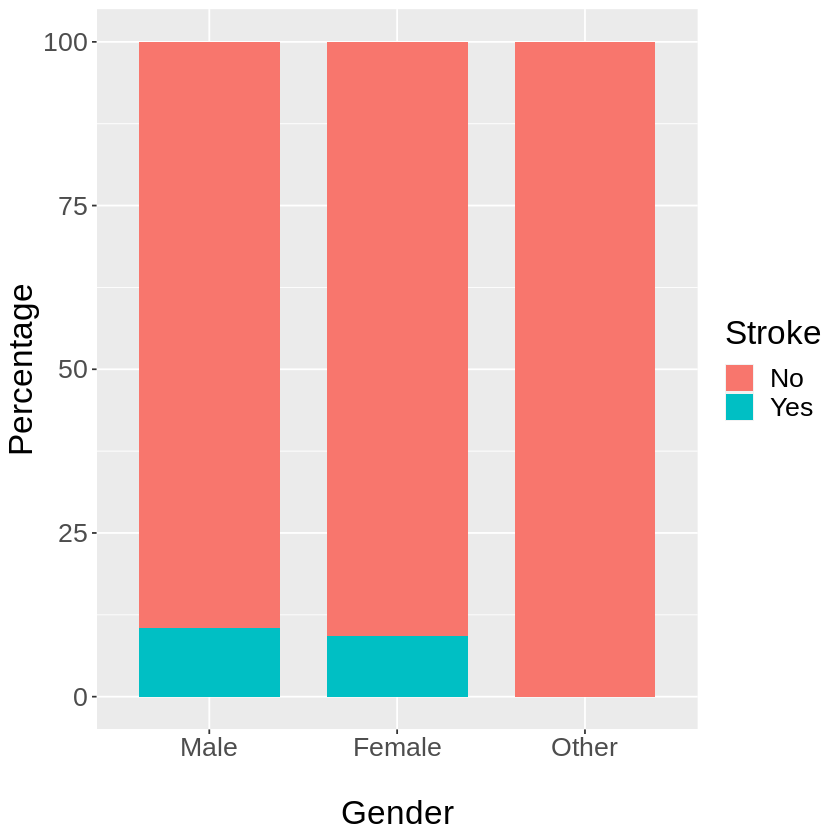

In [3]:
stroke_age <- stroke %>%
  count(gender, stroke) %>%
  group_by(gender) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(x = gender, y = percentage, fill = stroke)) +
  geom_bar(stat = "identity", width = .75) +
  labs(x = "\nGender", y = "Percentage", fill = "Stroke") +
  theme(text = element_text(size = 20))
stroke_age

Warning message:
“position_stack requires non-overlapping x intervals”


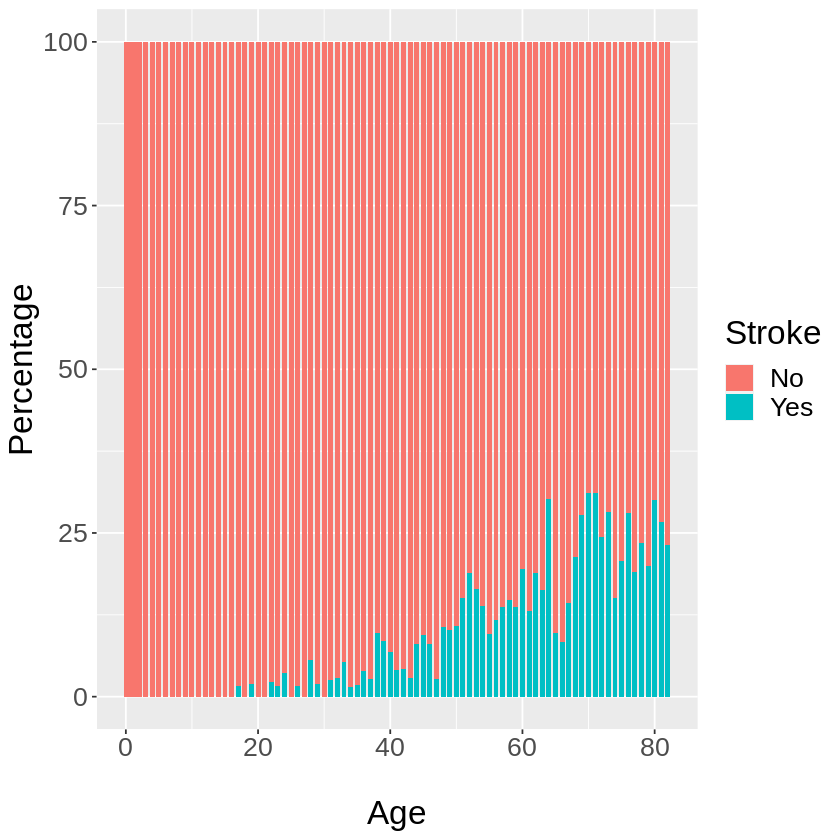

In [4]:
stroke_age <- stroke %>%
  count(age, stroke) %>%
  group_by(age) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(x = age, y = percentage, fill = stroke)) +
  geom_bar(stat = "identity", width = .75) +
  labs(x = "\nAge", y = "Percentage", fill = "Stroke") +
  theme(text = element_text(size = 20))
stroke_age

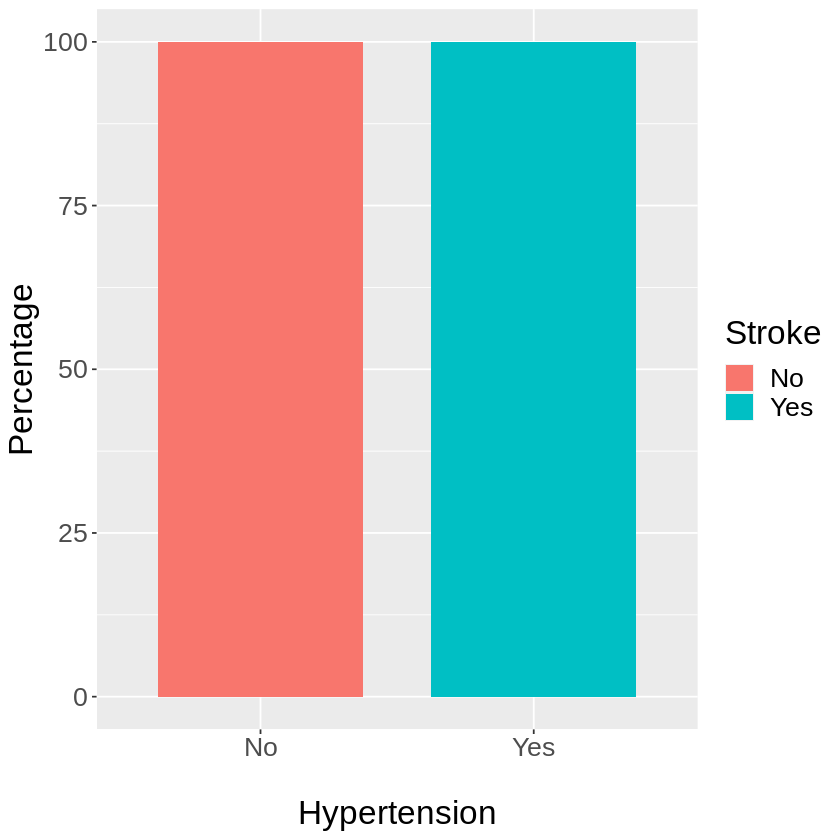

In [5]:
stroke_hypertension <- stroke %>%
  count(hypertension, stroke) %>%
  group_by(hypertension) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(x = hypertension, y = percentage, fill = stroke)) +
  geom_bar(stat = "identity", width = .75) +
  labs(x = "\nHypertension", y = "Percentage", fill = "Stroke") +
  theme(text = element_text(size = 20))
stroke_hypertension


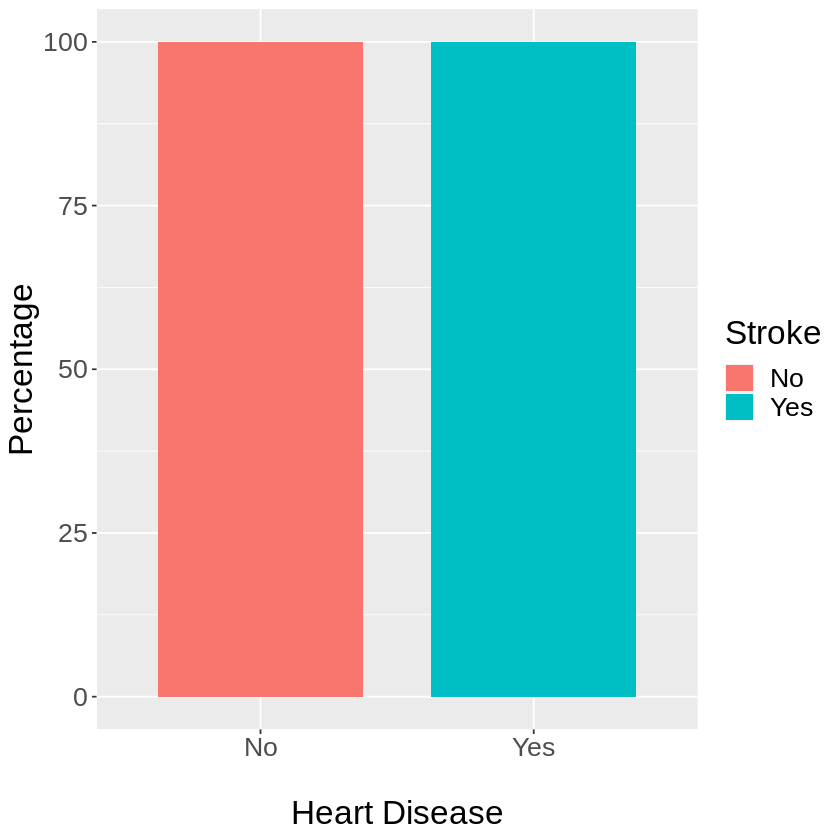

In [6]:
stroke_heart_disease <- stroke %>%
  count(heart_disease, stroke) %>%
  group_by(heart_disease) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(x = heart_disease, y = percentage, fill = stroke)) +
  geom_bar(stat = "identity", width = .75) +
  labs(x = "\nHeart Disease", y = "Percentage", fill = "Stroke") +
  theme(text = element_text(size = 20))
stroke_heart_disease
#gender	age	hypertension	heart_disease	residence_type	avg_glucose_level	bmi	smoking_status	stroke

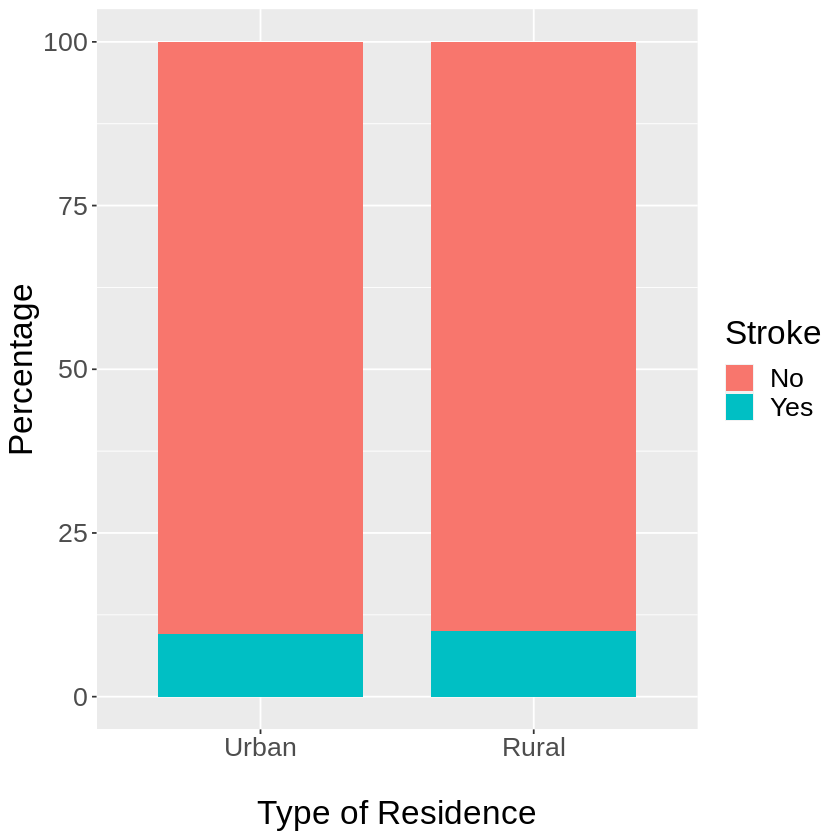

In [7]:
stroke_residence <- stroke %>%
  count(residence_type, stroke) %>%
  group_by(residence_type) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(x = residence_type, y = percentage, fill = stroke)) +
  geom_bar(stat = "identity", width = .75) +
  labs(x = "\nType of Residence", y = "Percentage", fill = "Stroke") +
  theme(text = element_text(size = 20))
stroke_residence

Warning message:
“position_stack requires non-overlapping x intervals”


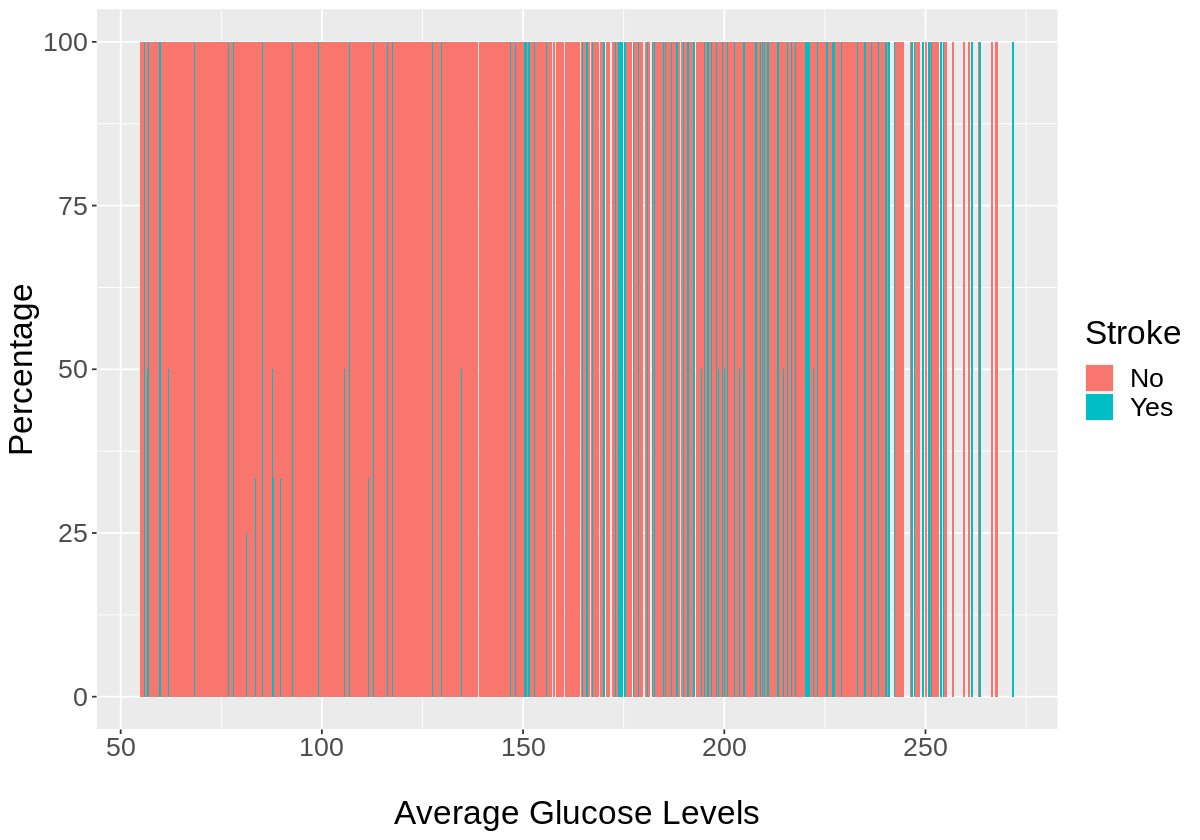

In [23]:
stroke_avg_glucose_level <- stroke %>%
  count(avg_glucose_level, stroke) %>%
  group_by(avg_glucose_level) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(x = avg_glucose_level, y = percentage, fill = stroke)) +
  geom_bar(stat = "identity", width = .5) +
  labs(x = "\nAverage Glucose Levels", y = "Percentage", fill = "Stroke") +
  theme(text = element_text(size = 20))
stroke_avg_glucose_level


Warning message:
“Removed 2 rows containing missing values (position_stack).”
Warning message:
“position_stack requires non-overlapping x intervals”


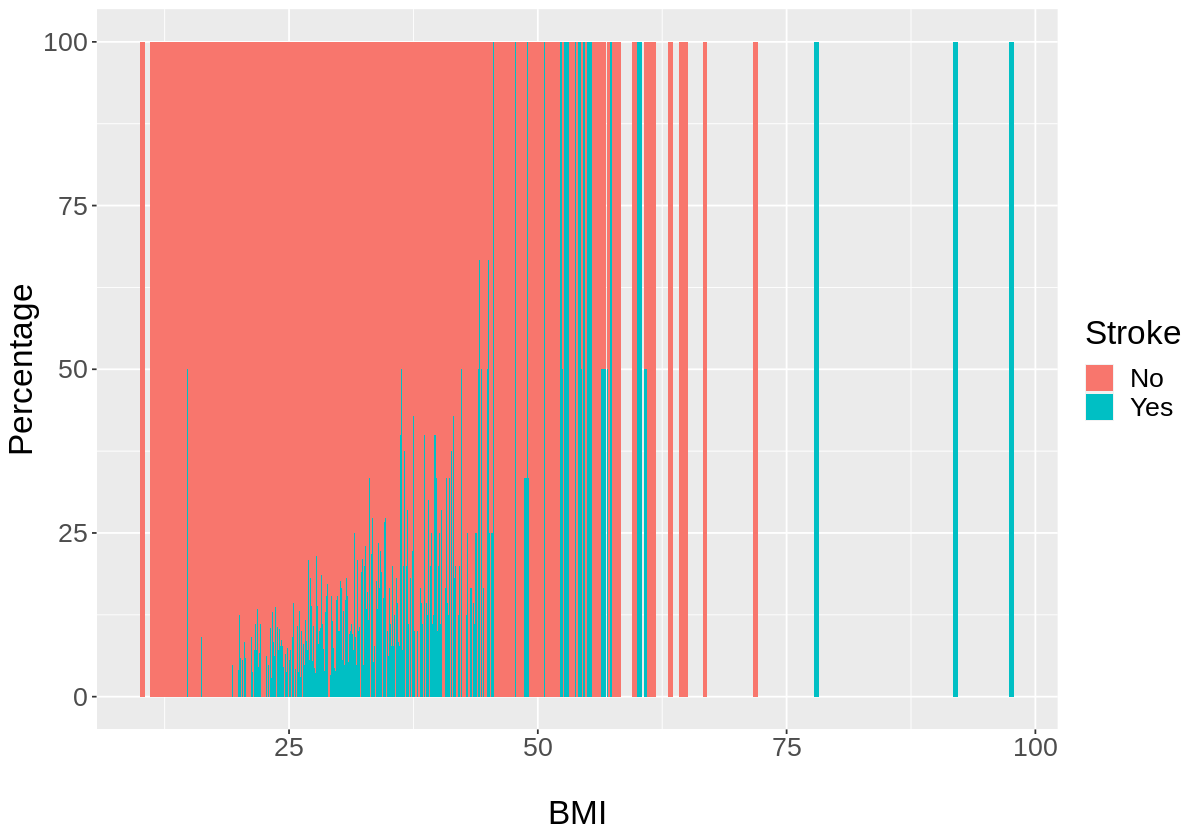

In [24]:
stroke_bmi <- stroke %>%
  count(bmi, stroke) %>%
  group_by(bmi) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(x = bmi, y = percentage, fill = stroke)) +
  geom_bar(stat = "identity", width = .5) +
  labs(x = "\nBMI", y = "Percentage", fill = "Stroke") +
  theme(text = element_text(size = 20))
stroke_bmi


Warning message:
“Removed 2 rows containing missing values (position_stack).”
Warning message:
“position_stack requires non-overlapping x intervals”


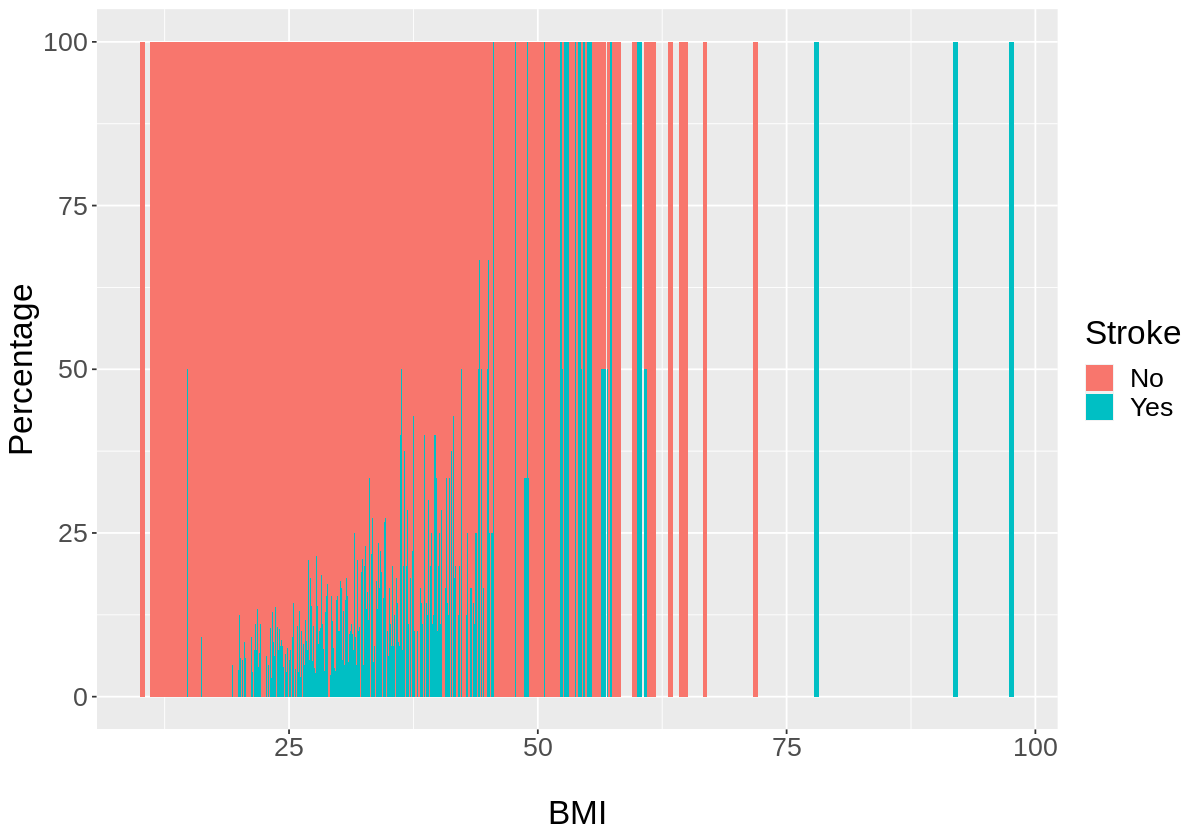

In [25]:
stroke_bmi <- stroke %>%
  count(bmi, stroke) %>%
  group_by(bmi) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(x = bmi, y = percentage, fill = stroke)) +
  geom_bar(stat = "identity", width = .5) +
  labs(x = "\nBMI", y = "Percentage", fill = "Stroke") +
  theme(text = element_text(size = 20))
stroke_bmi

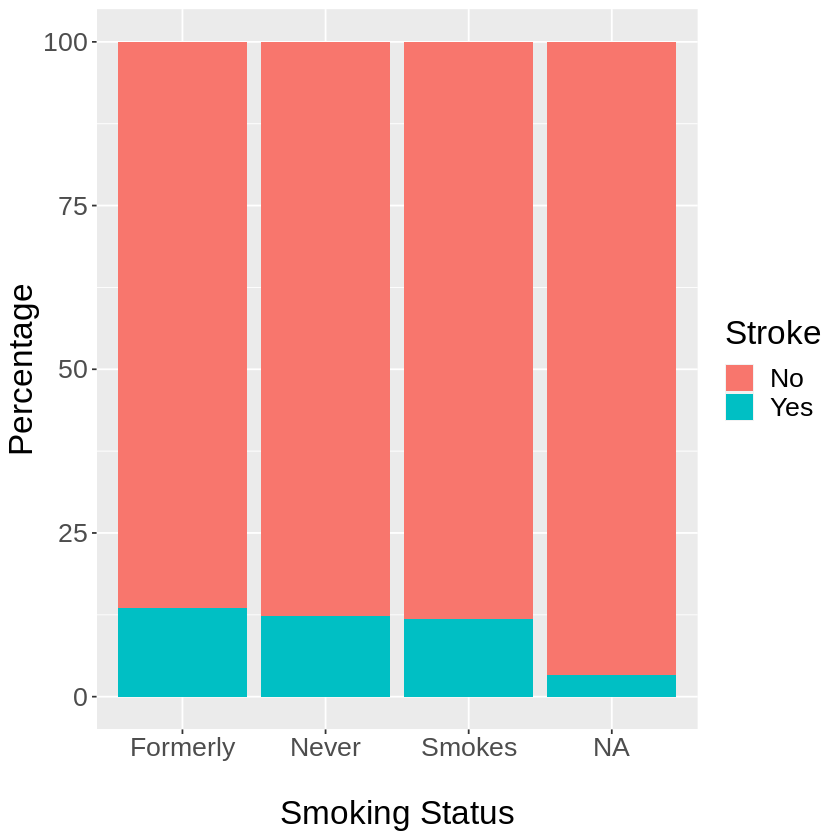

In [11]:
stroke_smoking_status <- stroke %>%
  count(smoking_status, stroke) %>%
  group_by(smoking_status) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(x = smoking_status, y = percentage, fill = stroke)) +
  geom_bar(stat = "identity") +
  labs(x = "\nSmoking Status", y = "Percentage", fill = "Stroke") +
  theme(text = element_text(size = 20))
stroke_smoking_status

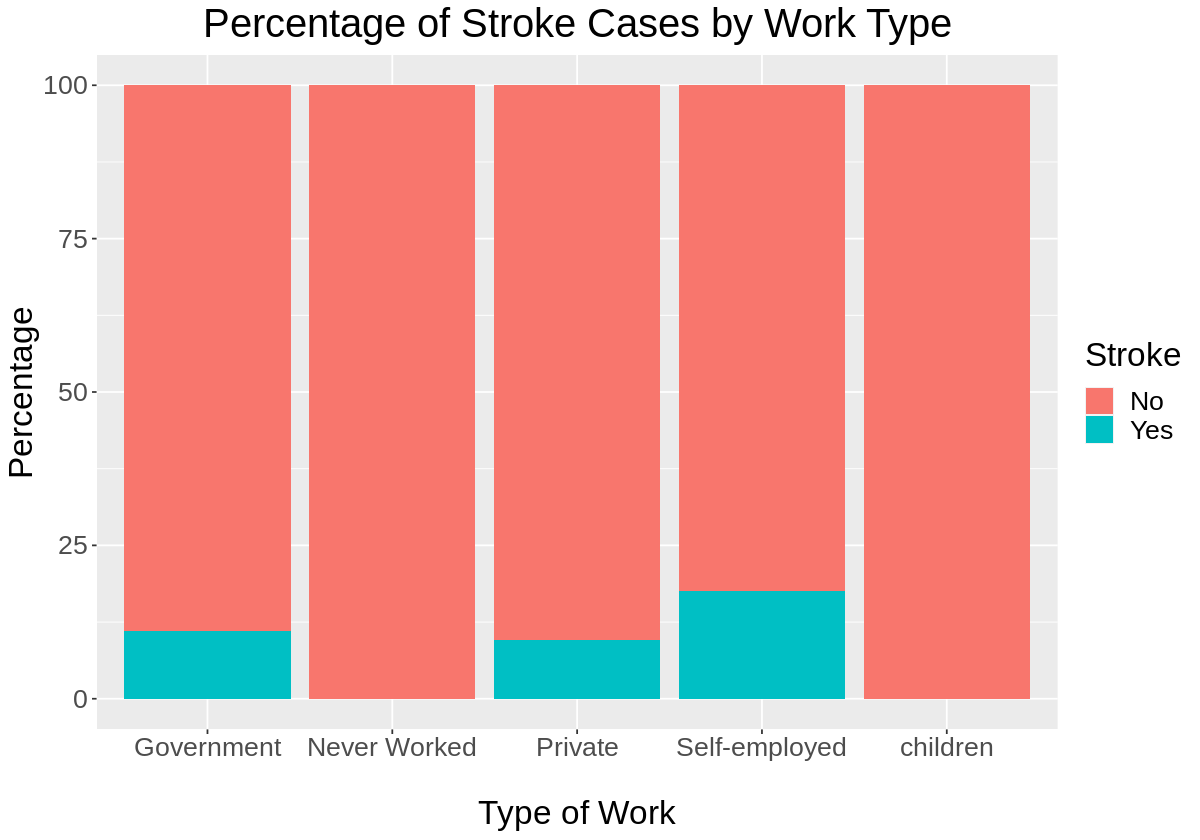

In [26]:
stroke_worktype_plot <- stroke |>
  count(work_type, stroke) |>
  group_by(work_type) |>
  mutate(percentage = n / sum(n) * 100) |>
  ggplot(aes(x = work_type, y = percentage, fill = stroke)) +
  geom_bar(stat = "identity") +
  labs(x = "\nType of Work", y = "Percentage", fill = "Stroke", title = "Percentage of Stroke Cases by Work Type") +
  theme(text = element_text(size = 20),
    plot.title = element_text(hjust = 0.5))
stroke_worktype_plot

# Further Analysis

Warning message:
“position_stack requires non-overlapping x intervals”


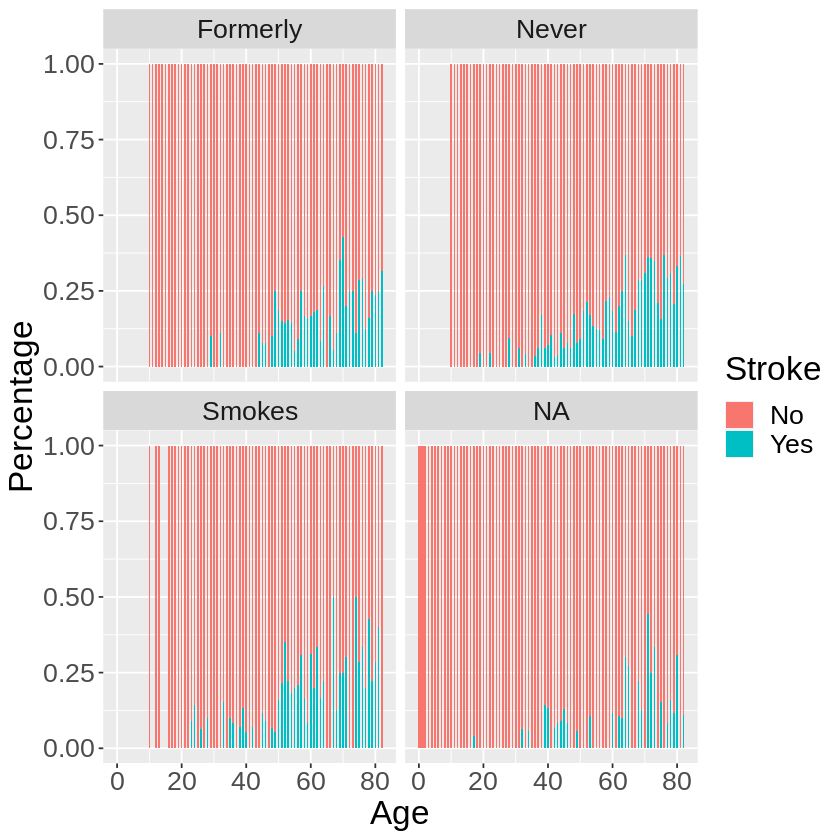

In [13]:
# stroke_age_smoking <- stroke %>%
#   ggplot(aes(x = age, fill = stroke, color = smoking_status)) +
#   geom_histogram(position = "identity", alpha = 0.8, bins = 30) +
#   labs(x = "Age", y = "Count", fill = "Stroke Status", color = "Smoking Status") +
#   scale_fill_manual(values = c("No" = "blue", "Yes" = "red")) +
#   scale_color_manual(values = c("Never" = "green", "Formerly" = "purple", "Smokes" = "orange")) +
#   theme_bw()

# stroke_age_smoking

# stroke_age_smoking <- stroke %>%
#   ggplot(aes(x = age, fill = stroke, color = smoking_status)) +
#   geom_bar() +
#   labs(x = "Age", y = "Count", fill = "Stroke", color = "Smoking Status") +
#   theme(text = element_text(size = 15))

# stroke_age_smoking


stroke_age_smoking <- stroke %>%
  ggplot(aes(x = age, fill = stroke)) +
  geom_bar(aes(y = ..count.. / sum(..count..)), position = "fill", width = .5) +


  facet_wrap(~ smoking_status) +
  labs(x = "Age", y = "Percentage", fill = "Stroke") +
  theme(text = element_text(size = 20))

stroke_age_smoking


# stroke_age_smoking <- stroke %>%
#   ggplot(aes(x = age, y = stroke, color = smoking_status)) +
#   geom_point(position = position_dodge(width = 0.5), size = 3) +
#   labs(x = "Age", y = "Stroke Status", color = "Smoking Status", title = "Age and Smoking Status with Stroke") +
#   theme_bw()

# stroke_age_smoking


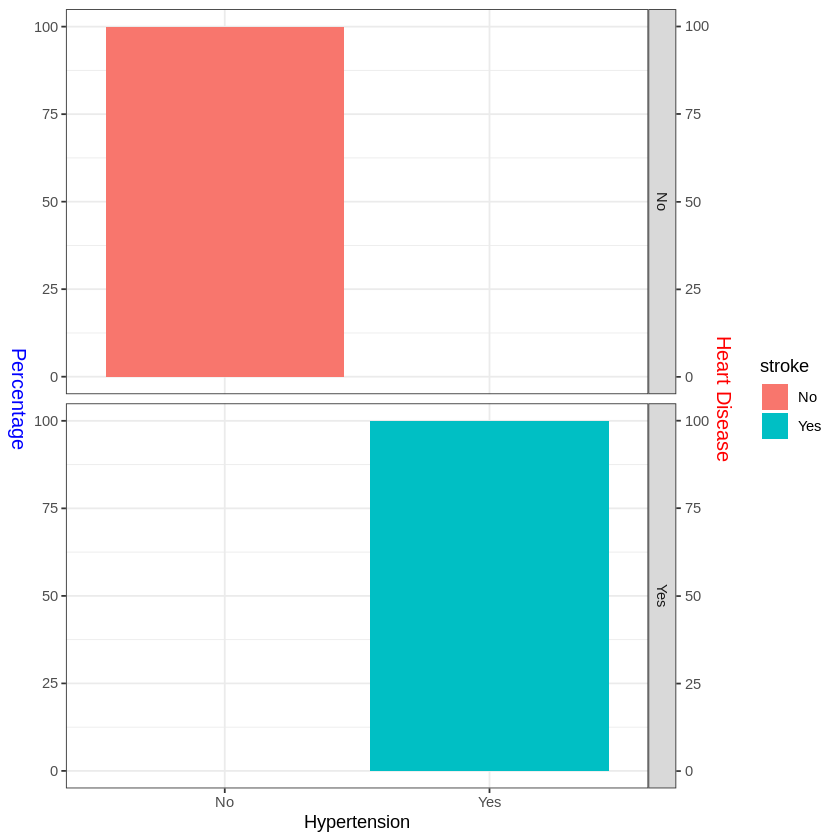

In [14]:
# Compute the percentage of stroke and heart disease cases by hypertension status

stroke_hypertension <- stroke %>%
  count(hypertension, stroke, heart_disease) %>%
  group_by(hypertension) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  ungroup()

ggplot(stroke_hypertension, aes(x = hypertension, y = percentage, fill = stroke)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(x = "Hypertension", y = "") +
  facet_grid(heart_disease ~ .) +
  theme_bw() +
  theme(
    axis.title.y.right = element_text(color = "red", size = 12, angle = -90, vjust = 0.5),
    axis.title.y.left = element_text(color = "blue", size = 12, angle = -90, vjust = 0.5)
  ) +
  scale_y_continuous(
    name = "Percentage",
    sec.axis = sec_axis(~ ., name = "Heart Disease")
  )


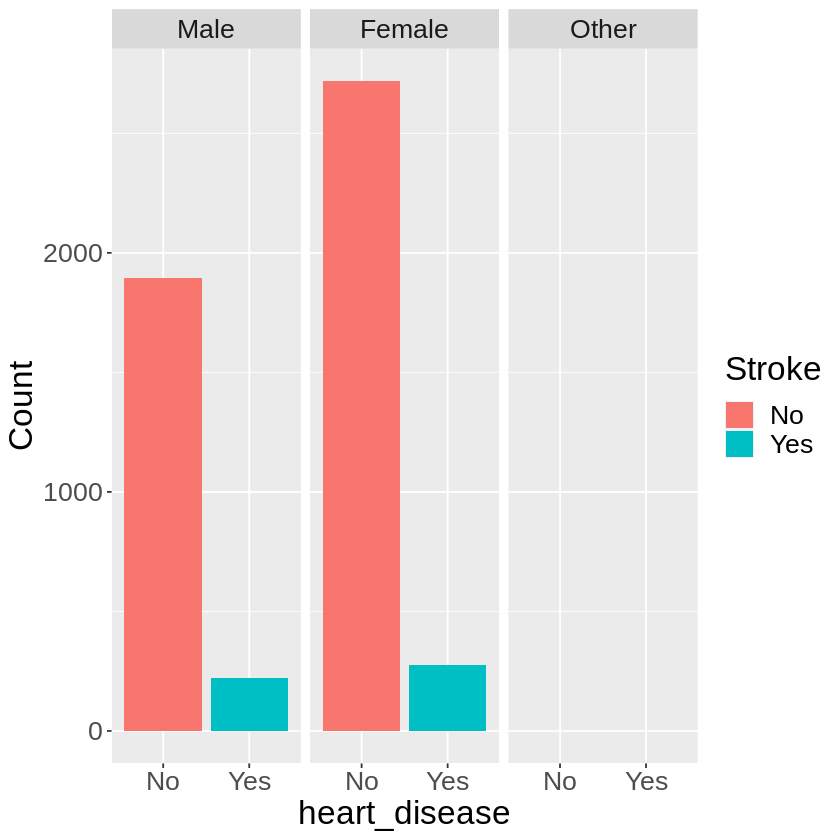

In [15]:
stroke_gender <- stroke %>%
  ggplot(aes(x = heart_disease, fill = stroke)) +
  geom_bar() +
  facet_wrap(~ gender) +
  labs(x = "heart_disease", y = "Count", fill = "Stroke") +
  theme(text = element_text(size = 20))

stroke_gender

Warning message:
“Removed 201 rows containing missing values (geom_point).”


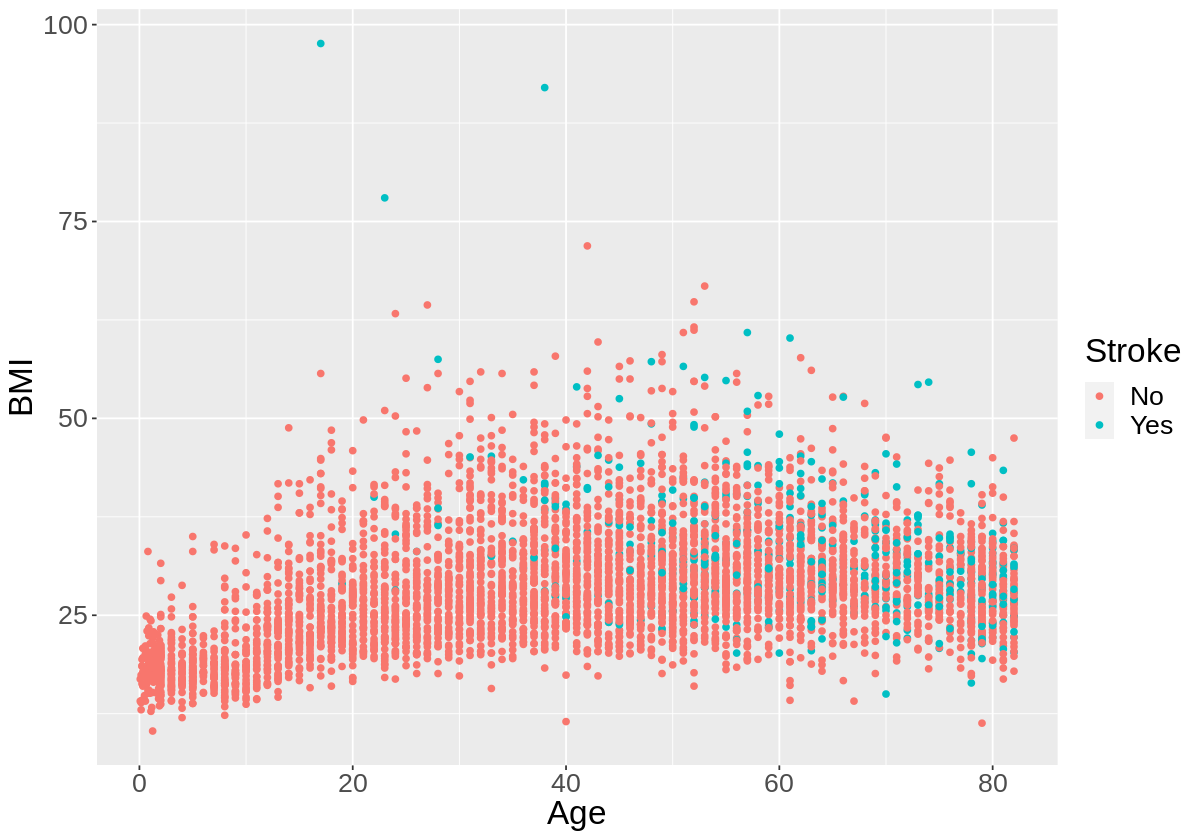

In [32]:
stroke_bmi <- stroke %>%
  ggplot(aes(x = age, y = bmi, colour = stroke)) +
  geom_point() +
  labs(x = "Age", y = "BMI", color = "Stroke") +
  theme(text = element_text(size = 20))

stroke_bmi

Warning message:
“Removed 201 rows containing missing values (geom_point).”


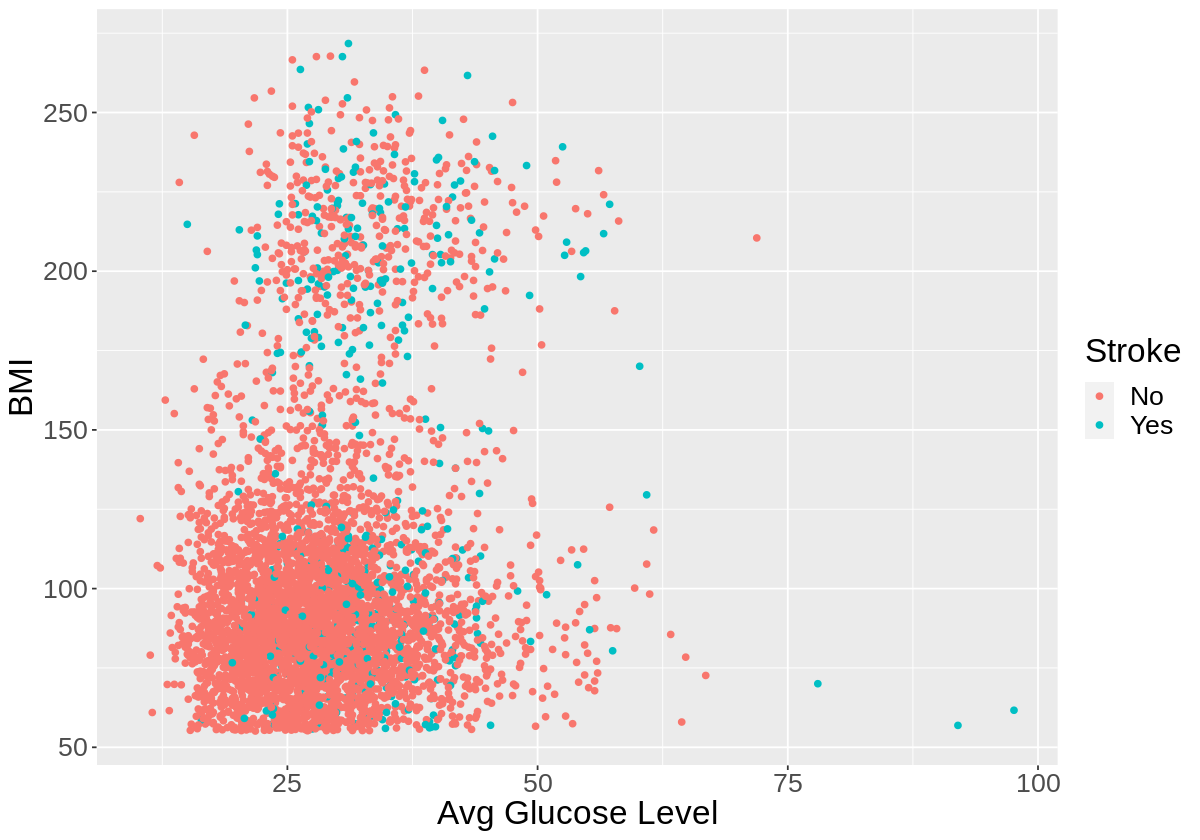

In [35]:
stroke_bmi <- stroke %>%
  ggplot(aes(x = bmi, y = avg_glucose_level, colour = stroke)) +
  geom_point() +
  labs(x = "Avg Glucose Level", y = "BMI", color = "Stroke") +
  theme(text = element_text(size = 20))

stroke_bmi

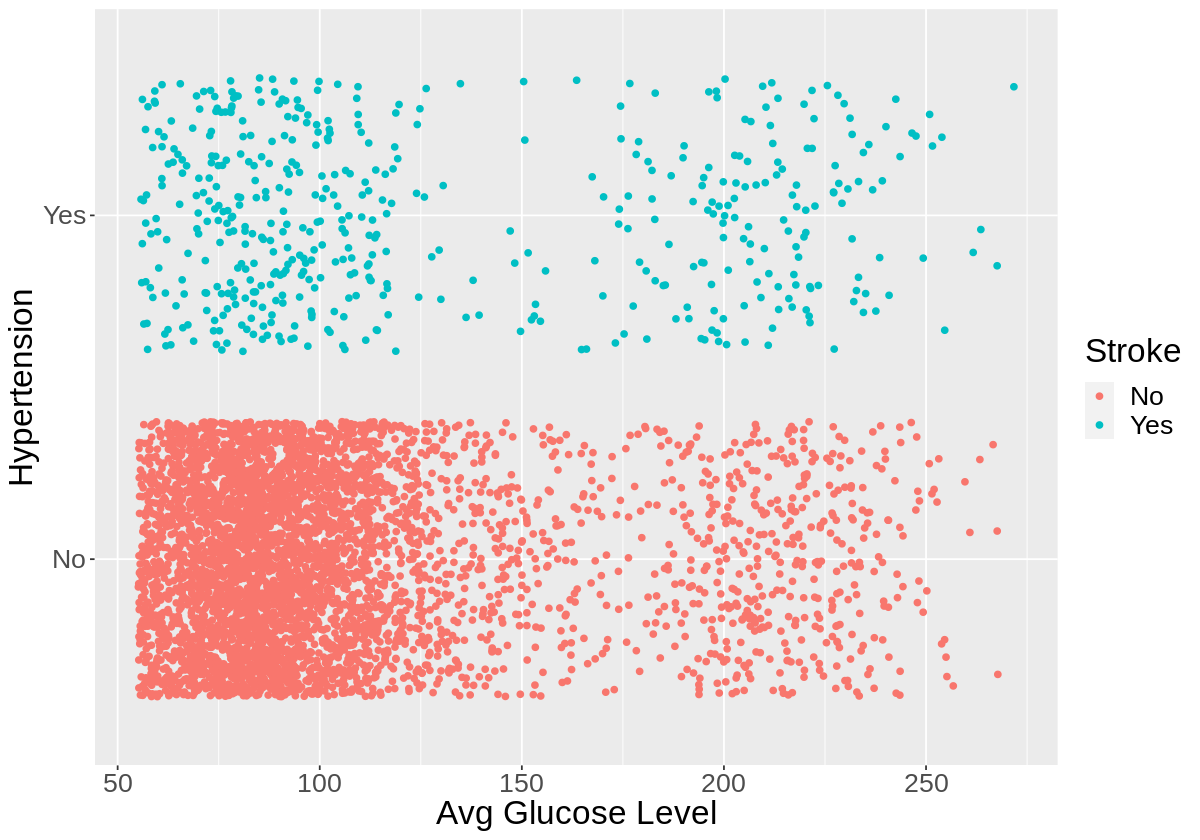

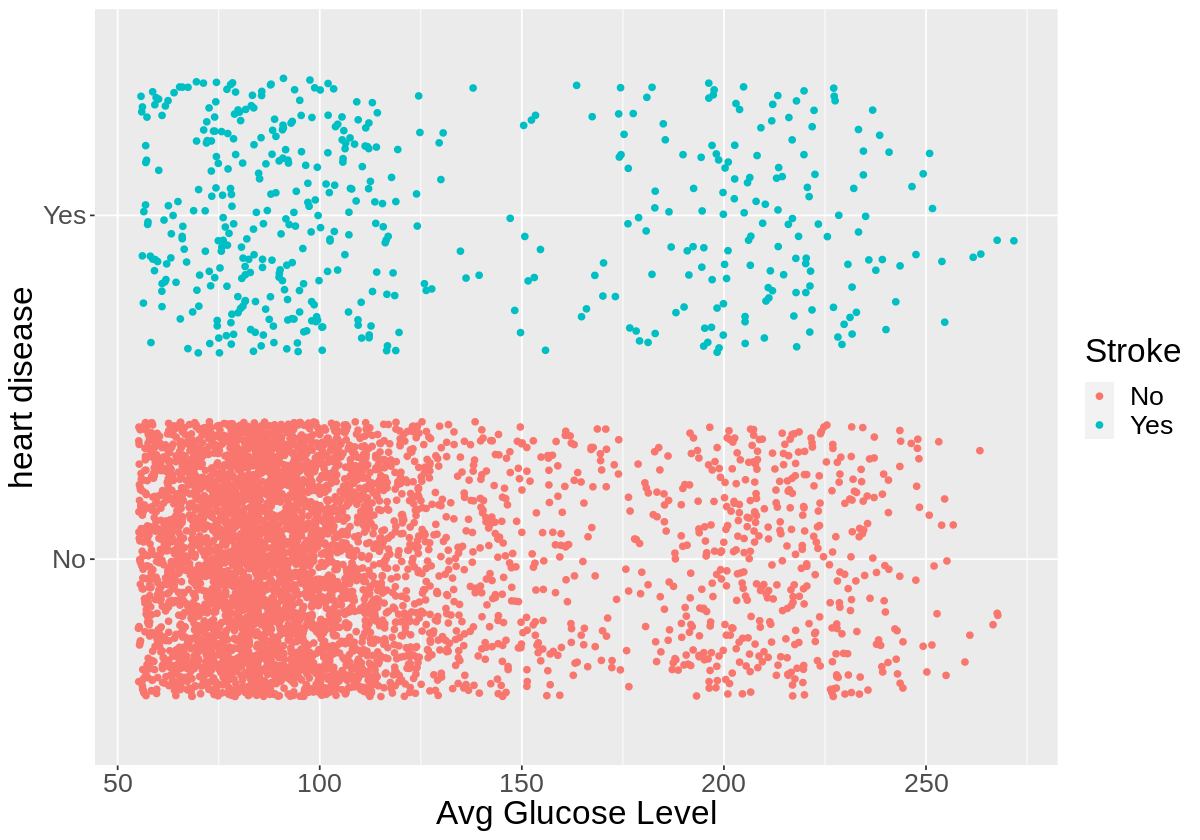

In [66]:
stroke_bmi <- stroke %>%
  ggplot(aes(x = avg_glucose_level, y = hypertension, colour = stroke)) +
  geom_jitter() +
  labs(x = "Avg Glucose Level", y = "Hypertension", color = "Stroke") +
  theme(text = element_text(size = 20))

stroke_bmi

stroke_bmi <- stroke %>%
  ggplot(aes(x = avg_glucose_level, y = heart_disease, colour = stroke)) +
  geom_jitter() +
  labs(x = "Avg Glucose Level", y = "heart disease", color = "Stroke") +
  theme(text = element_text(size = 20))

stroke_bmi

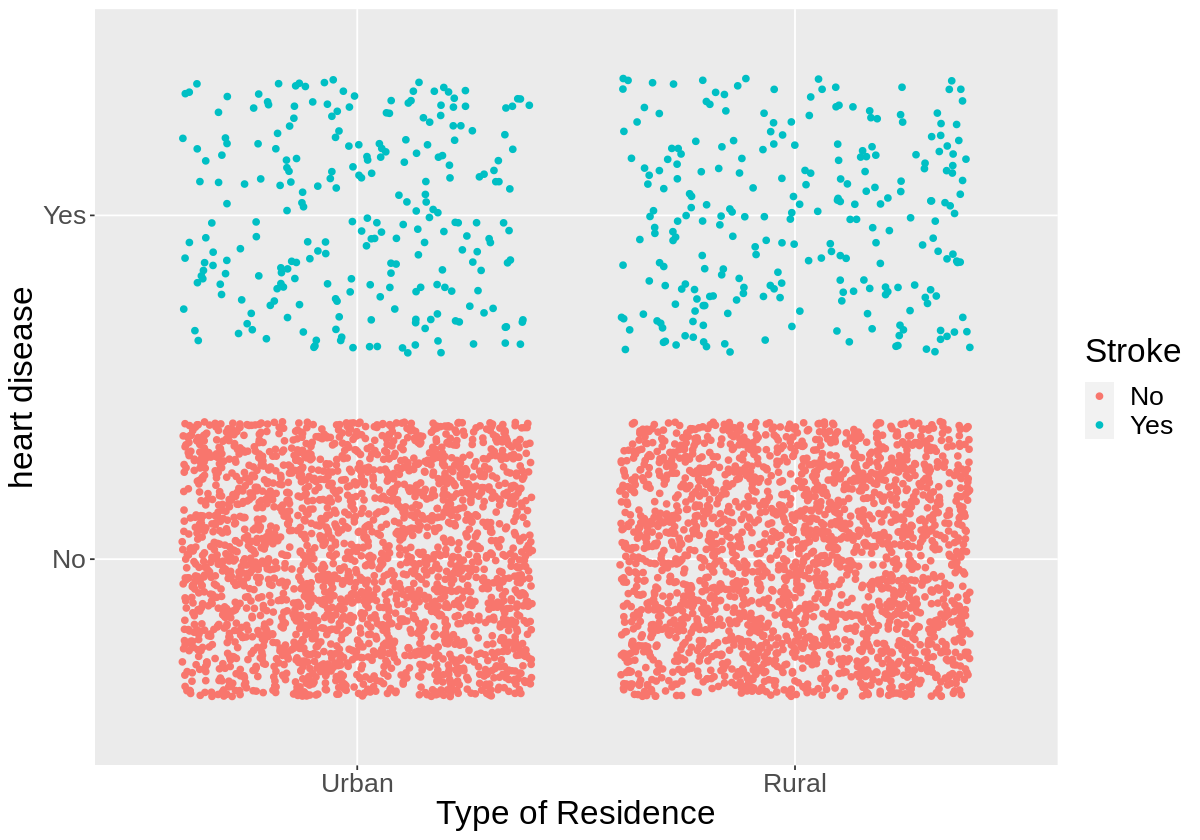

In [65]:

stroke_bmi <- stroke %>%
  ggplot(aes(x = residence_type, y = heart_disease, colour = stroke)) +
  geom_jitter() +
  labs(x = "Type of Residence", y = "heart disease", color = "Stroke") +
  theme(text = element_text(size = 20))

stroke_bmi

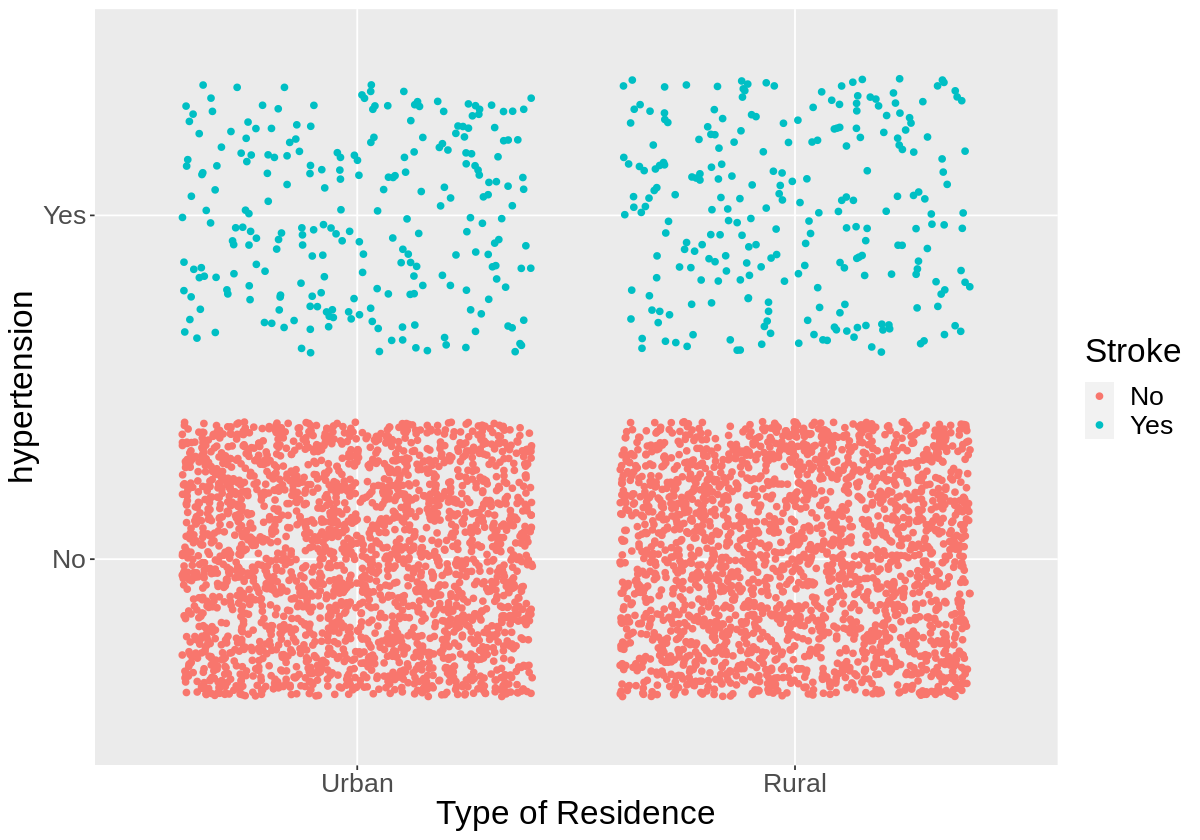

In [68]:

stroke_bmi <- stroke %>%
  ggplot(aes(x = residence_type, y = hypertension, colour = stroke)) +
  geom_jitter() +
  labs(x = "Type of Residence", y = "hypertension", color = "Stroke") +
  theme(text = element_text(size = 20))

stroke_bmi

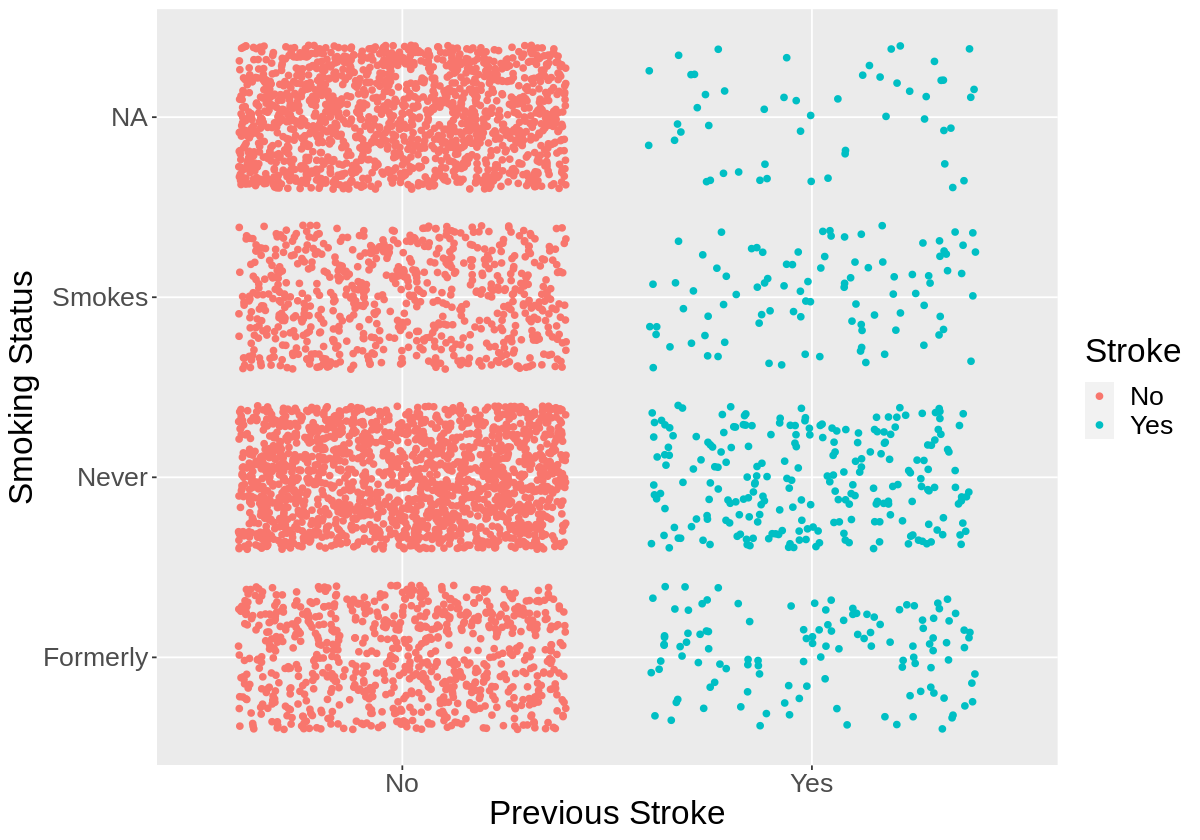

In [17]:
options(repr.plot.width = 10, repr.plot.height = 7)
stroke_prelim_vis <- stroke |> ggplot(aes(x = stroke, y = smoking_status, color = stroke)) + 
    geom_jitter() +
    labs(x = "Previous Stroke", y = "Smoking Status", color = "Stroke") +
    theme(text = element_text(size = 20))
stroke_prelim_vis
#geom_jitter
#gender	age	hypertension	heart_disease	residence_type	avg_glucose_level	bmi	smoking_status	stroke

In [18]:
# options(repr.plot.width = 20, repr.plot.height = 14)


# library(GGally)
# library(broom)

# pm_pairs <- stroke %>%
#   select(gender:stroke) %>%
#   ggpairs()

# pm_pairs

